Name: Geovani Mendoza

# Staff Augmentation Dataset

The dataset is about a company that provides IT Staff Augmentation services to it's clients.

## Part 1. Load the dataset

### dataset contains the following columns

<b>project_id</b>, represents the id of the project, type integer. </br>
<b>project_name</b>, name of the project, type string.</br>
<b>customer_name</b>, customer to which the company provide services to, type string. </br>
<b>account_annual_revenue</b>, the amount of money that client pays to the company, type double. </br>
<b>assigned_resources</b>, quantity of developers assigned to complete the client's project, type integer. </br>

In [1]:
import pandas as pd
data = pd.read_csv('accounts.csv')

In [2]:
data

,project_id,project_name,customer_name,account_annual_revenue,assigned_resources
0,1,College Readiness App Development,Julia LLC,1500000.0,5.0
1,2,College Readiness Analytics,Julia LLC,300000.0,2.0
2,3,Unity Web Development,CollegeFox LLC,150000.0,1.0
3,4,Paypal Mobile App,Paypal Inc,10000000.0,15.0
4,5,Paypal Mobile Testing App,Paypal Inc,600000.0,5.0
5,6,Github Testing,Github Inc,700000.0,9.0
6,7,Book Seller Web Development,Ucons LLC,450000.0,4.0
7,8,Book Seller Back-End Development,Ucons LLC,650000.0,4.0
8,9,Student Connect,Coursera Inc,20500000.0,27.0
9,10,Student Connect 2,Coursera Inc,100000.0,NaN


## Part 2. Numpy

In [3]:
import numpy as np

In [4]:
annual_revenue = np.array(data['account_annual_revenue'])
print(annual_revenue)

[ 1500000.   300000.   150000. 10000000.   600000.   700000.   450000.
   650000. 20500000.   100000.]


In [5]:
print("Mean revenue:       ", annual_revenue.mean())
print("Standard deviation:", annual_revenue.std())
print("Minimum revenue:    ", annual_revenue.min())
print("Maximum revenue:    ", annual_revenue.max())
print("Variance:    ", np.var(annual_revenue))

Mean revenue:        3495000.0
Standard deviation: 6339930.993315306
Minimum revenue:     100000.0
Maximum revenue:     20500000.0
Variance:     40194725000000.0


### Digging into the data

In [6]:
# getting the project that has exactly 1 member
assigned_resources = np.array(data['assigned_resources'])

In [7]:
assigned_resources == 1

array([False, False,  True, False, False, False, False, False, False,
       False])

In [8]:
# sorting the revenue
revenue = np.array(data['account_annual_revenue'])
np.sort(revenue)

array([  100000.,   150000.,   300000.,   450000.,   600000.,   650000.,
         700000.,  1500000., 10000000., 20500000.])

In [9]:
# structured data
project_name = np.array(data['project_name'])
developers = np.array(data['assigned_resources'])

structured_data = np.zeros(developers.size, dtype = {'names':('project_name', 'developers'),
          'formats':('U50', 'i4')})

In [10]:
structured_data['project_name'] = project_name
structured_data['developers'] = developers
print(structured_data)

[('College Readiness App Development',           5)
 ('College Readiness Analytics',           2)
 ('Unity Web Development',           1) ('Paypal Mobile App',          15)
 ('Paypal Mobile Testing App',           5)
 ('Github Testing',           9)
 ('Book Seller Web Development',           4)
 ('Book Seller Back-End Development',           4)
 ('Student Connect',          27) ('Student Connect 2', -2147483648)]


## Part 3. Data Manipulation with Pandas

In [11]:
import pandas as pd
data = pd.read_csv('accounts.csv')

In [12]:
revenue = pd.Series(data['account_annual_revenue'])
revenue

0     1500000.0
1      300000.0
2      150000.0
3    10000000.0
4      600000.0
5      700000.0
6      450000.0
7      650000.0
8    20500000.0
9      100000.0
Name: account_annual_revenue, dtype: float64

In [13]:
# making dataframes
dataf = pd.DataFrame({'project_name': data['project_name'],'assigned_resources': data['assigned_resources']})
dataf
# much easier than building an structured array with NumPy

,project_name,assigned_resources
0,College Readiness App Development,5.0
1,College Readiness Analytics,2.0
2,Unity Web Development,1.0
3,Paypal Mobile App,15.0
4,Paypal Mobile Testing App,5.0
5,Github Testing,9.0
6,Book Seller Web Development,4.0
7,Book Seller Back-End Development,4.0
8,Student Connect,27.0
9,Student Connect 2,NaN


In [14]:
# Filling null values
# Last project does not have assined resources
data = data.fillna(0)

# convertinf flaot column to integer
data.assigned_resources = data.assigned_resources.astype(int)
data

,project_id,project_name,customer_name,account_annual_revenue,assigned_resources
0,1,College Readiness App Development,Julia LLC,1500000.0,5
1,2,College Readiness Analytics,Julia LLC,300000.0,2
2,3,Unity Web Development,CollegeFox LLC,150000.0,1
3,4,Paypal Mobile App,Paypal Inc,10000000.0,15
4,5,Paypal Mobile Testing App,Paypal Inc,600000.0,5
5,6,Github Testing,Github Inc,700000.0,9
6,7,Book Seller Web Development,Ucons LLC,450000.0,4
7,8,Book Seller Back-End Development,Ucons LLC,650000.0,4
8,9,Student Connect,Coursera Inc,20500000.0,27
9,10,Student Connect 2,Coursera Inc,100000.0,0


now the last project at least has 0 assigned resources and not NaN

In [15]:
# Indexing
# getting the project that have exactly 5 developers assigned
m_index = pd.MultiIndex.from_arrays([data.project_name, data.assigned_resources])
m_index

MultiIndex([('College Readiness App Development',  5),
            (      'College Readiness Analytics',  2),
            (            'Unity Web Development',  1),
            (                'Paypal Mobile App', 15),
            (        'Paypal Mobile Testing App',  5),
            (                   'Github Testing',  9),
            (      'Book Seller Web Development',  4),
            ( 'Book Seller Back-End Development',  4),
            (                  'Student Connect', 27),
            (                'Student Connect 2',  0)],
           names=['project_name', 'assigned_resources'])

In [16]:
m_index[5:6]

MultiIndex([('Github Testing', 9)],
           names=['project_name', 'assigned_resources'])

## Part 4. Visualization with Matplotlib

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
assigned_resources = np.array(data['assigned_resources'])

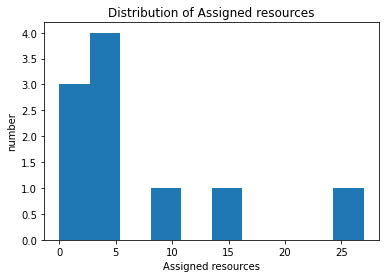

In [19]:
plt.hist(assigned_resources)
plt.title('Distribution of Assigned resources')
plt.xlabel('Assigned resources')
plt.ylabel('number');

there are more teams betwen 1 and 5 members, than teams over 10